# Statistical Rethinking Second Edition

Ini adalah kesimpulan yang didapatkan dari buku *Statistical Rethinking* tulisan Professor Richard McElreath. Buku ini berisi tentang pendekatan statistik untuk penelitian dengan cara Bayesian. Dalam buku ini, dapat diketemukan beberapa contoh kasus dan penerapan-nya dalam kode R yang akan kami terjemahkan ke dalam python.

In [2]:
import numpy as np
import itertools

## Chapter 2: Small Worlds and Large Worlds

Pada bab ini, penulis berargumen bahwa dalam setiap penelitian selalu ada dua buah dunia. Pertama adalah dunia nyata dimana kasus terjadi dan yang kedua adalah dunia tempat penelitian dijalankan. Beberapa penelitian dalam buku ini adalah membentuk model yang juga menjadi representasi dari *small word*. Dalam upaya mengambil beberapa bagian dari dunia nyata dan memodelkannya dalam ruang isolasi, dibutuhkan asumsi-asumsi yang berkaitan dengan upaya tersebut. Asumsi ini ada karena *small world* tidak mungkin mereplikasi apa yang sebenernya terjadi--entah karena memang tidak ada model yang cocok atau membutuhkan usaha komputasi yang besar--dan memudahkan perhitungan untuk beberapa kasus.

**Soal 1** Ada empat buah kelereng bewarna biru dan putih dan sebuah kantung. Tidak diketahui berapa jumlah kelerang yang biru dan yang putih. Estimasi jumlah kelereng berwarna biru dan putih berdasarkan hasil yang ditarik (dan dikembalikan lagi) dari kantung.

In [3]:
collection = itertools.combinations_with_replacement("WB", 4)
for num, val in enumerate(collection):
    print(num, val)

0 ('W', 'W', 'W', 'W')
1 ('W', 'W', 'W', 'B')
2 ('W', 'W', 'B', 'B')
3 ('W', 'B', 'B', 'B')
4 ('B', 'B', 'B', 'B')


Setidaknya ada 5 kemungkinan bagaimana komposisi kelereng dalam kantung. Dalam buku ini, penulis mengatakan ini adalah dugaan dari komposisi dalam kantung. Tugas kami adalah mencari mana yang paling masuk akal. Asumsilah bahwa penarikan kelereng menghasilkan **Biru**, **Putih**, dan **Biru**.

Mari kami telaah satu dari lima dugaan yaitu nomor 1. Dalam dugaan nomor 1, ada 4 kemungkinan yang terjadi saat pengambilan kelereng. dimana ada 3 warna putih dan satu warna biru. Pada pengambilan kelereng yang kedua, masing-masing kemungkinan akan memiliki 4 kemungkinan juga sehingga total kemungkinan menjadi $4^2=16$. Pada pengambilan ketiga masing masing dari 16 kemungikinan ini akan memiliki 4 kemungkinan lagi sehingga total kemungkinan adalah $4^3=64$

In [4]:
collection1 = itertools.product('WWWB', repeat=1)
print("First draw")
for num, val in enumerate(collection1):
    print(num, val)

collection2 = itertools.product('WWWB', repeat=2)
print("Second draw")
for num, val in enumerate(collection2):
    print(num, val)

collection3 = itertools.product('WWWB', repeat=3)
print("Third draw")
for num, val in enumerate(collection3):
    print(num, val)

First draw
0 ('W',)
1 ('W',)
2 ('W',)
3 ('B',)
Second draw
0 ('W', 'W')
1 ('W', 'W')
2 ('W', 'W')
3 ('W', 'B')
4 ('W', 'W')
5 ('W', 'W')
6 ('W', 'W')
7 ('W', 'B')
8 ('W', 'W')
9 ('W', 'W')
10 ('W', 'W')
11 ('W', 'B')
12 ('B', 'W')
13 ('B', 'W')
14 ('B', 'W')
15 ('B', 'B')
Third draw
0 ('W', 'W', 'W')
1 ('W', 'W', 'W')
2 ('W', 'W', 'W')
3 ('W', 'W', 'B')
4 ('W', 'W', 'W')
5 ('W', 'W', 'W')
6 ('W', 'W', 'W')
7 ('W', 'W', 'B')
8 ('W', 'W', 'W')
9 ('W', 'W', 'W')
10 ('W', 'W', 'W')
11 ('W', 'W', 'B')
12 ('W', 'B', 'W')
13 ('W', 'B', 'W')
14 ('W', 'B', 'W')
15 ('W', 'B', 'B')
16 ('W', 'W', 'W')
17 ('W', 'W', 'W')
18 ('W', 'W', 'W')
19 ('W', 'W', 'B')
20 ('W', 'W', 'W')
21 ('W', 'W', 'W')
22 ('W', 'W', 'W')
23 ('W', 'W', 'B')
24 ('W', 'W', 'W')
25 ('W', 'W', 'W')
26 ('W', 'W', 'W')
27 ('W', 'W', 'B')
28 ('W', 'B', 'W')
29 ('W', 'B', 'W')
30 ('W', 'B', 'W')
31 ('W', 'B', 'B')
32 ('W', 'W', 'W')
33 ('W', 'W', 'W')
34 ('W', 'W', 'W')
35 ('W', 'W', 'B')
36 ('W', 'W', 'W')
37 ('W', 'W', 'W')
38 (

Tentu saja tidak semua kemungkinan diatas didukung oleh data yang kami miliki. Oleh karena itu, hasil yang terakhir yang berjumlah 64 akan disaring dan akan dikumpulkan mana yang cocok dengan data yang dimiliki. Muncul 3 buah kemungkinan yang didukung oleh data. Ini hanya satu dari banyak lima dugaan yang ada. Mari kami periksa bagaimana dugaan-dugaan yang kami miliki.

In [5]:
def conjecture_fitting(conjecture, data):
    collection = itertools.product(conjecture, repeat=len(data))
    arr_buff = []
    for num, val in enumerate(collection):
        arr = list(val)
        if arr == data:
            arr_buff.append(1)
    return len(arr_buff)

print('Conjecture WWWW ',conjecture_fitting('WWWW', ['B', 'W', 'B']))
print('Conjecture WWWB ',conjecture_fitting('WWWB', ['B', 'W', 'B']))
print('Conjecture WWBB ',conjecture_fitting('WWBB', ['B', 'W', 'B']))
print('Conjecture WBBB ',conjecture_fitting('WBBB', ['B', 'W', 'B']))
print('Conjecture BBBB ',conjecture_fitting('BBBB', ['B', 'W', 'B']))

Conjecture WWWW  0
Conjecture WWWB  3
Conjecture WWBB  8
Conjecture WBBB  9
Conjecture BBBB  0


Menurut perhitungan yang kami buat, dugaan yang paling sesuai dengan data adalah dugaan ke 3 karena memiliki jumlah kemungkinan kombinasi yang sama dengan data paling tinggi dibandingkan dugaan lain. Oleh karena itu, memilih komposisi kelereng dugaan ke 3 adalah hal yang paling masuk akal. Asumsilah kami mengambil satu buah kelereng dan warananya adalah biru. Kita dapat menghitung ulang menggunakan cara yang sama dengan total kemungkinan adalah $4^4= 256$. Kita akan membandingkan dua cara, yaitu mengulang ulang perhitungan untuk 4 buah penarikan dan mengalikan kemungkinan sebelumnya (saat hanya memiliki data 3 buah penarikan) dengan kemungkinan yang baru (3 + 1 penarikan).

In [6]:
print("Recounting")
data = ['B', 'W', 'B', 'B']
print('Conjecture WWWW ',conjecture_fitting('WWWW', data))
print('Conjecture WWWB ',conjecture_fitting('WWWB', data))
print('Conjecture WWBB ',conjecture_fitting('WWBB', data))
print('Conjecture WBBB ',conjecture_fitting('WBBB', data))
print('Conjecture BBBB ',conjecture_fitting('BBBB', data))

print("\nUpdate Counting  P N T")
prev_data = ['B', 'W', 'B']
next_data = ['B']
def update_conjecture(conjecture, prev_data, next_data):
    prev_con = conjecture_fitting(conjecture, prev_data)
    next_con = conjecture_fitting(conjecture, next_data)
    return prev_con, next_con

prev_con, next_con = update_conjecture('WWWW', prev_data, next_data)
print('Conjecture WWWW ', prev_con, next_con, prev_con * next_con)

prev_con, next_con = update_conjecture('WWWB', prev_data, next_data)
print('Conjecture WWWB ', prev_con, next_con, prev_con * next_con)

prev_con, next_con = update_conjecture('WWBB', prev_data, next_data)
print('Conjecture WWBB ', prev_con, next_con, prev_con * next_con)

prev_con, next_con = update_conjecture('WBBB', prev_data, next_data)
print('Conjecture WBBB ', prev_con, next_con, prev_con * next_con)

prev_con, next_con = update_conjecture('BBBB', prev_data, next_data)
print('Conjecture BBBB ', prev_con, next_con, prev_con * next_con)

Recounting
Conjecture WWWW  0
Conjecture WWWB  3
Conjecture WWBB  16
Conjecture WBBB  27
Conjecture BBBB  0

Update Counting  P N T
Conjecture WWWW  0 0 0
Conjecture WWWB  3 1 3
Conjecture WWBB  8 2 16
Conjecture WBBB  9 3 27
Conjecture BBBB  0 4 0


Ternyata hasil dari menggunakan perhitungan ulang dan memperbarui perhitungan menggunakan perhitungan sebelumnya menghasilkan hasil yang sama. Secara komputasi, menggukanan metode memperbarui perhitungan lebih unggul karena tidak terbentur kompleksitas $4^n$ yang dimiliki oleh perhitungan ulang.

Ditanyakan proporsi antara air dan tanah pada suatu bola bumi. Informasi yang diberikan adalah hasil dari melempar bola bumi tersebut dan menangkapnya. Diambil letak jari manis pada tangan kanan untuk menentukan apakah hasil lemparan ini mendarat pada tanah atau air. Ini sebenernya mirip dengan kasus pelemparan koin, hanya saja untuk pelemparan koin khalayak umum biasanya mengasumsi koin jujur--kemungkinan muncul angka dan gambar adalah sama--sedangkan untuk bola bumi khalayak umum hanya memiliki asumsi bahwa air lebih banyak daripada tanah. 

Kita akan coba memodelkan pelemparan ini sambil menerjemahkan kode penulis dari R menjadi Python.

Jumlah pelemparan yang menghasilkan air $W$ dilambangkan dengan proporsi $p$ sedangkan yang menghasilkan tanah $L$ dilambangkan dengan $1-p$. Dikarenakan ini adalah contoh kasus binomial, maka akan diterapkan distribusi binomial yang dapat dijabarkan sebagai

$$Pr(W, L|p) = \frac{(W+L)!}{W!L!}p^W(1-p)^L$$

Dibawah ini adalah class dari pelemparan yang sudah ada metode metode untuk membantu memudahkan pengolahan.

In [7]:
import numpy as np
from scipy.stats import binom, norm, beta
from sklearn.preprocessing import MinMaxScaler

from scipy.special import comb
import matplotlib.pyplot as plt

class globe_toss:
    def __init__(self):
        self.toss_history = []
        self.probability_land = 0.5
        self.probability_water = 0.5
        self.prior_function = None
        
    def toss(self, number_toss):
        result = np.random.choice(["W", "L"], number_toss, p=[self.probability_water, self.probability_land])
        self.toss_history = np.append(self.toss_history, result)
        return
    
    def reset_history(self):
        self.toss_history = []
        return
    
    def get_water_total(self):
        return np.count_nonzero(self.toss_history == "W")
    
    def get_land_total(self):
        return np.count_nonzero(self.toss_history == "L")
    
    def get_binom_toss(self):
        k = self.get_water_total()
        n = len(self.toss_history)
        p = self.probability_water
        return binom.pmf(k, n, p)
    
    def get_binom_grid(self, x_grid):
        k = self.get_water_total()
        n = len(self.toss_history)
        return [binom.pmf(k, n, p) for p in x_grid]
    
    def analytical_solution(self, n_grid=100):
        a = self.get_water_total()
        b = self.get_land_total()
        return [beta.pdf(i, a + 1, b + 1) for i in np.linspace(0,1,n_grid)]
    
    def grid_calculate_posterior(self, n_grid=100):
        x_grid = np.linspace(0, 1, n_grid)
        if self.prior_function is None:
            y_prior = np.ones(n_grid)
        else:
            y_prior = np.array([self.prior_function(i) for i in x_grid])
        likelihood = self.get_binom_grid(x_grid)
        posterior = np.multiply(y_prior, likelihood) / np.sum(np.multiply(y_prior, likelihood))
        return x_grid, self.normalize_array(posterior)
    
    def normalize_array(self, array):
        array = np.array(array)
        arr_max = np.max(array)
        arr_min = np.min(array)
        interval = arr_max - arr_min
        
        result = (array - arr_min) / interval
        return result
    def register_prior_function(self, prior_function):
        self.prior_function = prior_function
    
    def grid_approx_plot(self):
        plt.figure(1, figsize = (11,6))
        plt.title("Posterior Distribution (Grid Approximation)")
        axes = plt.gca()
        axes.set_xlim([-0.1, 1.1])
        axes.set_xlabel("Probability of Water")
        axes.set_ylabel("Posterior")
        axes.grid()
        
        x_grid, posterior = self.grid_calculate_posterior(5)
        plt.plot(x_grid, posterior, label='5 Approx Normalized')
        
        x_grid, posterior = self.grid_calculate_posterior(10)
        plt.plot(x_grid, posterior, label='10 Approx Normalized')
        
        x_grid, posterior = self.grid_calculate_posterior(25)
        plt.plot(x_grid, posterior, label='25 Approx Normalized')
        
        x_grid, posterior = self.grid_calculate_posterior(100)
        plt.plot(x_grid, posterior, label='100 Approx Normalized')
        
        x_grid = np.linspace(0,1,100)
        plt.plot(
            x_grid, 
            self.normalize_array(np.array(self.analytical_solution(100))), 
            label='Analytical Normalized'
        )
        plt.legend()
    
    def quadratic_approximation_plot(self):
        prior = 1
        
        plt.figure(1, figsize = (11,6))
        plt.title("Posterior Distribution (Quadratic Approximation)")
        axes = plt.gca()
        axes.set_xlim([-0.1, 1.1])
        axes.set_xlabel("Probability of Water")
        axes.set_ylabel("Posterior")
        axes.grid()
        
        plt.plot(x_grid, posterior)
        

In [8]:
toss1 = globe_toss()
# Override the history so it match with book's example
toss1.toss_history = np.array(['W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'W'])
toss1.get_binom_toss()

0.16406250000000006

Dalam ilmu probabilistik kemungkinan terjadinya dua kejadian pada saat yang sama dapat dituliskan sebagai

$$Pr(a, b) = Pr(a|b) Pr(b)$$
> Kemungkinan terjadinya kejadian $a$ dan $b$ adalah hasil perkalian dari kemungkinan kejadian $a$ apabila $b$ terjadi dan kemungkinan $b$ terjadi.

Dalam kasus yang kami miliki $a$ sama dengan $W, L$ atau proporsi dari darat dan laut--dapat digabungkan karena apabila $W$ diketahui maka $L$ juga dapat diketahui--dan $b$ adalah kemungkinan mendaratkan air $p$. Yang kami cari disini adalah probablitas dari pendaratan di air $p$ apabila jumlah $W$ dan $L$ diketahui. Sehingga dapat ditulis

$$
\begin{align}
    &Pr(W, L, p)  = Pr(W, L|p) Pr(p) \\
    &Pr(W, L, p)  = Pr(p | W, L) Pr(W, L) \\
    &Pr(W, L|p) Pr(p)  = Pr(p | W, L) Pr(W, L) \\
    &Pr(p|W, L)  = \frac{Pr(W, L| p) Pr(p)}{Pr(W, L)} \\
\end{align}
$$
Ada empat komponen dalam persamaan diatas

- $Pr(W, L|p)$ adalah apa yang disebut dengan **likelihood** data yang dimiliki untuk saat ini
- $Pr(p)$ adalah apa yang disebut dengan **prior** yaitu probabilitas yang awal sebelum diperbarui
- $Pr(W, L)$ adalah **averaging** agar probabilitas tidak lebih dari satu
- $Pr(p|W, L)$ adalah **posterior** probabilitas yang didapatkan setelah memperbarui dengan data yang tersedia

Berbekal pengetahuan ini kita dapat mengestimasi probabilitas dari pendaratan di air. Ada tiga metode numerik yang dapat diterapkan dalam estimasi ini yaitu *Grid Approximation*, *Quadratic Approximation*, dan *Markov Chain Monte Carlo*. Dimulai dengan Grid Approximation dahulu karena cukup intuitif. 

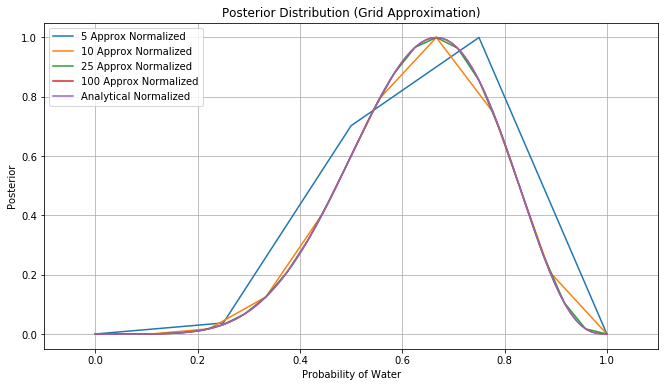

In [9]:
toss1.grid_approx_plot()

Grid approximation ini adalah memberikan sebuah vector dengan ukuran $n$ dan memiliki batas $[0, 1]$ dan memasukan masing-masing vector ke persamaan. Semakin tinggi bentuk vectorisasi-nya, maka akan semakin akurat juga.

> Ini kenapa kalo ngga di normalized semakin gede aproksimasinya semakin merunduk ya grafiknya?

Quadratic approximation adalah menggunakan distribusi normal untuk mencari bentuk distribusi normal mana yang paling mirip dengan posterior. Ini dapat dikerjakan dengan mencari rerata dan standar deviasi yang paling mewakili. Kami mencari rerata dengan mencari puncak dari estimasi. Puncak tersebut akan menjadi rerata dari distribusi normal.

### Chapter 2 Practice

**2M1** 

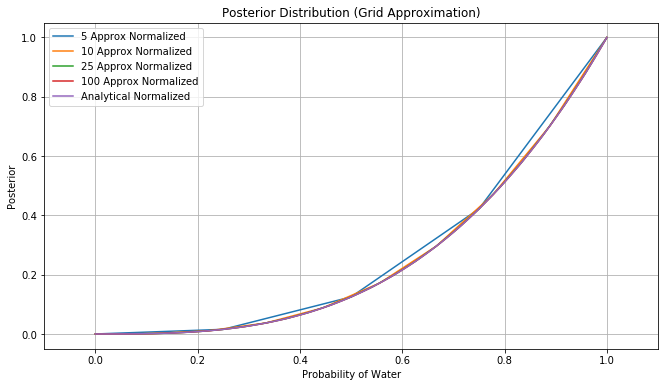

In [10]:
toss2 = globe_toss()
toss2.toss_history = np.array(['W', 'W', 'W'])
toss2.grid_approx_plot()

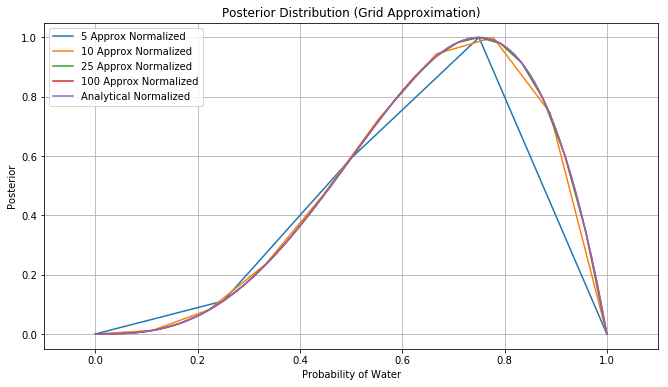

In [11]:
toss3 = globe_toss()
toss3.toss_history = np.array(['W', 'W', 'W', 'L'])
toss3.grid_approx_plot()

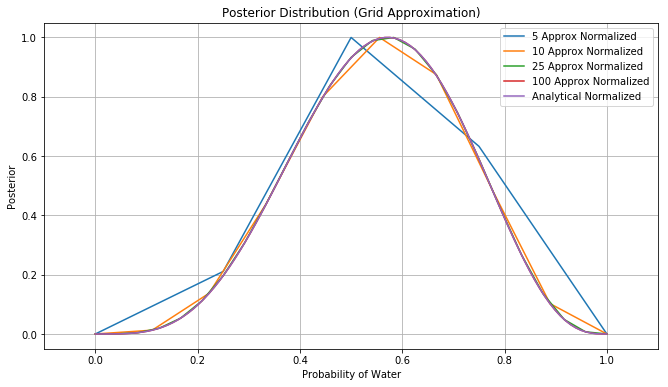

In [12]:
toss4 = globe_toss()
toss4.toss_history = np.array(['L', 'W', 'W', 'L', 'W', 'W', 'L'])
toss4.grid_approx_plot()

**Note** Mengapa nilai grid approksimasi dengan nominal kecil seperti 5 memiliki puncak berbeda dengan aproksimasi yang memiliki nominal lebih besar? Ini terjadi karena adanya normalisasi sehingga setiap puncak harus berada pada titik 1.

**2M2** 

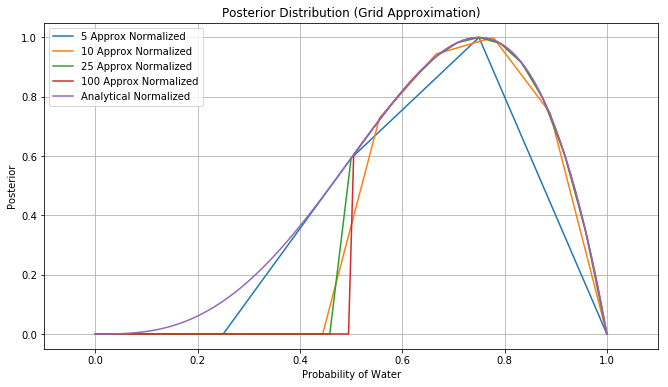

In [15]:
def step_function(x):
    if x < 0.5:
        return 0
    elif x >= 0.5:
        return 1

toss5 = globe_toss()
toss5.register_prior_function(step_function)

toss5.toss_history = np.array(['W', 'W', 'W', 'L'])
toss5.grid_approx_plot()

Seperti yang dapat dilihat pada hasil aproksimasi, ada nilai cutoff pada 0.5 dikarenakan prior dengan nilai yang lebih rendah dari 0.5 nilainya 0 dan menghasilkan plot yang flat 0 pada nilai sebelum 0.5

**2M3**. 

Berdasarkan deskripsi diatas dapat dipetakan menjadi dua probabilitas, yang pertama adalah probabilitas dari mana yang akan dilemparkan, bumi atau mars, yang sama sama bernilai 0.5. Selanjutnya adalah kejadian tempat mendaratnya, apakah mendarat pada tanah atau air. Untuk bumi kemungkinan mendarat pada tanah adalah 0.3 dan pada air adalah 0.7. Untuk mars, mendarat pada air adalah 0 dan mendarat pada darat adalah 1.

$Pr(Earth|land)$ dapat dihasilkan dari $\frac{Pr(Earth, land)}{Pr(land)}$. $Pr(land)$ dapat dihasilkan dari menjumlahkan kemungkinan land dan dibagi dengan asalnya 

$$Pr_{land} = \frac{Pr_{land}^{mars} + Pr_{land}^{earth}}{2} = \frac{1 + 0.3}{2} = 0.65$$

$$Pr(Earth, land) = Pr(Earth) Pr_{land}^{earth} = 0.15 $$

$$Pr(Earth|land) = \frac{0.15}{0.65} = 0.23$$

**2M3** 

Ada 6 kemungkinan yang bisa didapatkan dari penjumlahan kartu. Ini hasil dari perkalian jumlah kartu yang dimiliki dan sisi yang dimiliki setiap kartu. Yang ditanyakan adalah berapa kemungkinan sisi bawah kartu berwarna hitam apabila sisi atas kartu berwarna hitam.

Kemungkinan mendapatkan kartu hitam adalah $0.5$. Tapi dikarenakan yang ditanyakan adalah kemungkinan kartu sisi bawah adalah hitam menjadikan sampel kartu hanya 2--yang keduanya hitam dan yang memiliki sisi hitam dan putih.

$$
\begin{align}
Pr(Black, Black) &= Pr(Black | Black) Pr(Black) \\
\frac{1}{3} &= Pr(Black | Black) \frac{1}{2} \\
Pr(Black | Black) &=\frac{1}{3}2 \\ 
Pr(Black | Black) &=\frac{2}{3} \\ 
\end{align}
$$


In [29]:
import itertools, pprint
import numpy as np
pp = pprint.PrettyPrinter(indent=4)

possible_draw = list(itertools.product('BW', repeat=2))
first_draw_possibilities = [ np.count_nonzero(np.array(i)[0] == 'B') for i in possible_draw]
second_draw_possibilities = [ np.count_nonzero(np.array(i)[1] == 'B') for i in possible_draw]
for num, i in enumerate(possible_draw):
    print(num, i, first_draw_possibilities[num], second_draw_possibilities[num])

**2H1**

Mencari tahu probabilitas kejadian apabila suatu kejadian terjadi dapat dikerjakan dengan distribusi geometeri. Penjabaran distribusi geometeri adalah sebagai berikut, berapa kejadian yang terjadi dibutuhkan untuk terjadinya suatu kejadian. Semisal pada suatu kasus pelemparan koin yang sudah diketahui biasnya--semisal kemungkinan keluarnya kepala adalah 0.3--pada pelemparan keberapa akan muncul kepala.

Ini dapat dituliskan dengan

$$Pr(X = h) = (1 - p)^kp $$

semakin tinggi nilai $k$--jumlah percobaan ke $k$ yang menghasilkan kepala pertama kali-- semakin rendah pula probabilitasnya. Ini terjadi karena semakin berjalanya percobaan semakin kecil kemungkinan pelemparan koin selalu menghasilkan buntut.

Apabila diterapkan dengan ditanyakan oleh soal, ada dua spesies yang memiliki dua perbedaan melahirkan kembar. Diantara dua spesies tersebut, harus dibandingkan mana yang lebih mungkin melahirkan bayi kembar.
Spesies A memiliki kemungkinan $10%$ dan spesies B memiliki kemungkinan $20$.

Untuk spesies A kita mendapat
$$Pr(a) = (1-p)^kp = 0.9^1 \times 0.1 = 0.09$$

Untuk spesies B kita mendapat
$$Pr(b) = (1-p)^kp = 0.8^1 \times 0.2 = 0.16$$

Untuk mengetahui kemungkinan terlepas dari spesies dapat dituliskan dengan $Pr(a) + Pr(b) = 0.09 + 0.16 = 0.25$

Selanjutnya ditanyakan berapa kemungkinan kelahiran yang kedua juga kembar. Dibuat peta kemungkinan dari kejadian kelahiran

| Stage 0 | Stage 1         | Stage 2  | Stage 3  |
|---------|-----------------|----------|----------|
| Start   | Spesies A (0.5) | SB (0.9) | SB (0.9) |
|    -    |       -         |    -     | TB (0.1) |
|    -    |       -         | TB (0.1) | SB (0.9) |
|    -    |       -         |    -     | TB (0.1) |
|    -    | Spesies B (0.5) | SB (0.8) | SB (0.8) |
|    -    |       -         |    -     | TB (0.2) |
|    -    |       -         | TB (0.2) | SB (0.8) |
|    -    |       -         |    -     | TB (0.2) |

Ada dua jalur yang menghasilkakn kelahiran kembar (TB) yaitu `Spesies A-TB-TB` dan `Spesies B-TB-TB` dan kemungkinan terjadinya masing-masing adalah $0.5 \times 0.1 \times 0.1 = 0.005$ dan $0.5 \times 0.2 \times 0.2 = 0.02$ dan djumlahkan akan menghasilkan $0.025$. Angka yang didapatkan adalah probalitas mendapatkan dua kali kelahiran kembar **bukan** kelahiran kembar apabila sebelumnya adalah kembar. 

$$
\begin{align}
    P(\text{TB} | \text{TB}) &= \frac{P(TB, TB)}{P(TB)} \\
    P(\text{TB}, \text{TB}) &= P(A, (\text{TB}, \text{TB})) + P(B, (\text{TB}, \text{TB})) = 0.005 + 0.02 = 0.025 \\ 
    P(TB) &= P(TB, B) + P(TB, A) = 0.5 \times 0.1 + 0.5 \times 0.2 = 0.15 \\
    P(\text{TB} | \text{TB}) &= \frac{0.025}{0.15} = \frac{1}{6} \\
\end{align}
$$

**2H2**   
Menghitung kemungkinan bahwa yang melahirkan kembar untuk kedua kali adalah spesies A dapat ditulis sebagai $P(A|\text{TB})$. Diketahui bahwa $P(A, \text{TB}))$ adalah $0.5 \times 0.1 = 0.05$
$$
\begin{align}
    P(A|\text{TB}) &= \frac{P(A, \text{TB})}{P(A)} = \frac{0.05}{0.5} = 0.1 \\
    P(B|\text{TB}) &= \frac{P(B, \text{TB})}{P(B)} = \frac{0.1}{0.5} = 0.2 \\
    \\
    P(A|\text{SB}) &= \frac{P(A, \text{SB})}{P(A)} = \frac{0.45}{0.5} = 0.9 \\
    P(B|\text{SB}) &= \frac{P(B, \text{SB})}{P(B)} = \frac{0.4}{0.5} = 0.8 \\
\end{align}
$$

Dikarenakan $\text{TB}$ sudah menjadi ruang kemungkinan sendiri maka hasil dari $P(A|\text{TB})$ dan $P(B|\text{TB})$ dapat dinormalisasi dengan ketentuan $P(A|\text{TB}) + P(B|\text{TB}) = 1$. Setelah normalisasi, $P(A|\text{TB}) = \frac{1}{3}$ dan $P(B|\text{TB}) = \frac{2}{3}$

**2H3**    
Berdasarkan informasi yang sudah dikerjakan diatas, diketahui bahwa kelahiran kedua adalah tidak kembar. Menggunakan baeysian, dapat ditulis

$$P_{posterior}(A|(\text{TB}, \text{SB})) = \frac{P((\text{TB},\text{SB}|A)\times P_{prior}(A|\text{TB})}{P(\text{TB},\text{SB})}$$

Masing-masing bisa didapatkan dari peta kemungkinan dan soal sebelumnya

$$
\begin{align}
    P_{prior}(A|\text{TB}) &= \frac{1}{3} \\
    P(\text{TB},\text{SB}) &= (0.1 \times 0.9) + (0.2 \times 0.8) = 0.25 \\
    P((\text{TB},\text{SB})|A) &= 0.1 \times 0.9 = 0.09 \\
    P_{posterior}(A|(\text{TB}, \text{SB})) &= \frac{0.09 \times \frac{1}{3}}{0.25} = 0.12
\end{align}
$$

Untuk posterior apabila melahirkan kembar dua kali

$$
\begin{align}
    P_{prior}(A|\text{TB}) &= \frac{1}{3} \\
    P(\text{TB},\text{TB}) &= (0.1 \times 0.1) + (0.2 \times 0.2) = 0.05 \\
    P((\text{TB},\text{TB})|A) &= 0.1 \times 0.1 = 0.01 \\
    P_{posterior}(A|(\text{TB}, \text{TB})) &= \frac{0.01 \times \frac{1}{3}}{0.05} = 0.066
\end{align}
$$

**2H4**   
Ada tes genetik yang dapat menentukan bahwa spesies yang diteliti adalah A atau B. Tes tersebut memiliki probabilitas berhasil 0.8 untuk spesies A dan 0.65 untuk spesies B. Tes mengeluarkan hasil bahwasanya spesies yang dieteliti adalah spesies A.

$$
\begin{align}
    P(A|\text{GT}_A) &= \frac{P(A, \text{GT}_A)}{P(A)} = \frac{0.5 \times 0.8}{0.5} = 0.8
\end{align}
$$

Menggunakan informasi sebelumnya bahwa spesies tersebut sudah melahirkan kembar sekali dan non kembar sekali maka dapat ditulis

$$P_{posterior}(A|(\text{TB}, \text{SB}, \text{GT}_A)) = \frac{P((\text{TB},\text{SB}, \text{GT}_A)|A)\times P_{prior}(A|(\text{TB},\text{SB}))}{P(\text{TB},\text{SB}, \text{GT}_A)}$$

$$
\begin{align}
    P_{prior}(A|(\text{TB},\text{SB})) &= 0.12 \\
    P(\text{TB},\text{SB}, \text{GT}_A) &= (0.1 \times 0.9 \times 0.8) + (0.2 \times 0.8 \times 0.2) = 0.104 \\
    P((\text{TB},\text{SB}, \text{GT}_A)|A) &= 0.1 \times 0.9 \times 0.8 = 0.072 \\
    P_{posterior}(A|(\text{TB}, \text{SB})) &= \frac{0.072 \times 0.12}{0.104} = 0.083
\end{align}
$$

Apabila dilihat dari sebelumnya maka posterior lebih besar dari sebelum adanya $GT_A$ ini menandakan hasil dari tes genetik menambah kepercayaan dari $0.066$ menjadi $0.083$